In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "BAC"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,17.990000,18.030001,17.680000,17.900000,15.267413,48951100
2015-01-05,17.790001,17.809999,17.290001,17.379999,14.823888,105605500
2015-01-06,17.420000,17.440001,16.780001,16.860001,14.380368,144912400
2015-01-07,17.139999,17.180000,16.870001,16.940001,14.448602,104603800
2015-01-08,17.160000,17.340000,17.100000,17.290001,14.747125,73388500
...,...,...,...,...,...,...
2023-05-08,28.080000,28.150000,27.660000,27.690001,27.690001,34245500
2023-05-09,27.420000,27.830000,27.240000,27.660000,27.660000,32188800
2023-05-10,27.959999,28.000000,27.020000,27.320000,27.320000,44446400


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2105 entries, 2015-01-02 to 2023-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2105 non-null   float64
 1   High       2105 non-null   float64
 2   Low        2105 non-null   float64
 3   Close      2105 non-null   float64
 4   Adj Close  2105 non-null   float64
 5   Volume     2105 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 115.1 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,17.990000,18.030001,17.680000,17.900000,15.267413,48951100
2015-01-05,17.790001,17.809999,17.290001,17.379999,14.823888,105605500
2015-01-06,17.420000,17.440001,16.780001,16.860001,14.380368,144912400
2015-01-07,17.139999,17.180000,16.870001,16.940001,14.448602,104603800
2015-01-08,17.160000,17.340000,17.100000,17.290001,14.747125,73388500


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,28.080000,28.150000,27.660000,27.690001,27.690001,34245500
2023-05-09,27.420000,27.830000,27.240000,27.660000,27.660000,32188800
2023-05-10,27.959999,28.000000,27.020000,27.320000,27.320000,44446400
2023-05-11,27.010000,27.490000,26.879999,27.389999,27.389999,34837300
2023-05-12,27.520000,27.549999,27.080000,27.133499,27.133499,10108489


In [7]:
data.shape

(2105, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2.105000e+03
mean,27.668347,27.969321,27.355530,27.660629,25.661091,6.895968e+07
std,8.735183,8.821583,8.641806,8.727094,9.016952,3.549552e+07
min,11.460000,11.550000,10.990000,11.160000,9.634966,1.010849e+07
25%,22.410000,22.730000,22.160000,22.480000,19.878445,4.579080e+07
50%,28.240000,28.610001,27.870001,28.240000,25.827154,5.990580e+07
75%,33.070000,33.400002,32.700001,33.009998,31.657232,8.210490e+07
max,49.910000,50.110001,49.029999,49.380001,47.945423,3.750887e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

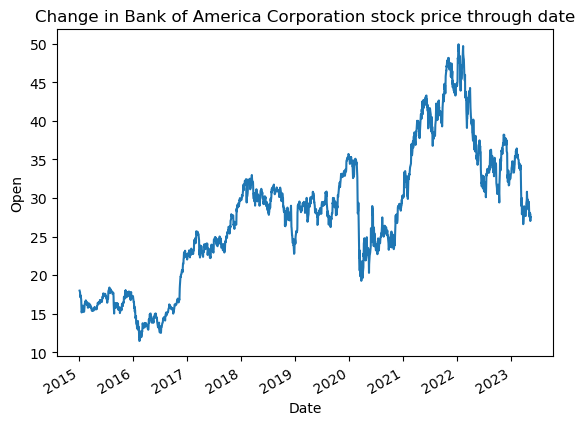

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank of America Corporation stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1578, 3), (527, 3))

In [15]:
y_train.shape,y_test.shape

((1578,), (527,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[32.29099892 23.13210024 23.01560022 16.33029985 16.46969994 27.10189966
 23.58660025 16.0008003  30.03039972 32.13250015 29.91799994 29.05829975
 28.61089996 28.47530008 30.90629965 27.61889946 30.67319969 20.75430012
 32.42519894 47.20600056 27.89600006 15.65910001 17.17240038 30.81810015
 37.13950096 28.8962999  30.97599983 44.10780045 14.86250002 43.16929993
 28.37649992 15.75669995 24.49619982 40.94160015 31.72230022 38.57779999
 29.95959986 38.66319916 24.82290022 33.75960026 32.72619968 22.53830034
 14.41019986 28.02039993 15.53040005 33.42480007 39.20210072 28.35809973
 15.22040012 31.3212998  26.37889999 31.17640007 14.21970007 39.10699886
 46.53759918 31.78890018 26.97910009 32.84340069 38.38340042 14.13310004
 23.55380014 23.84039963 15.01279998 33.58929993 13.2411004  34.21679928
 43.24969994 15.68580014 40.68880066 17.58480011 12.92789998 15.83210001
 28.05529984 23.81010002 31.68930021 35.3506007  46.32829933 23.47480017
 25.66749973 28.91489988 30.87900015 47.25180042 16

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.999095108940499


In [22]:
y_test=list(y_test)

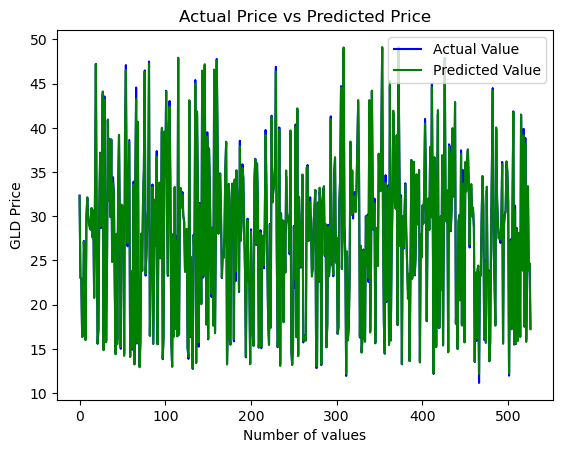

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

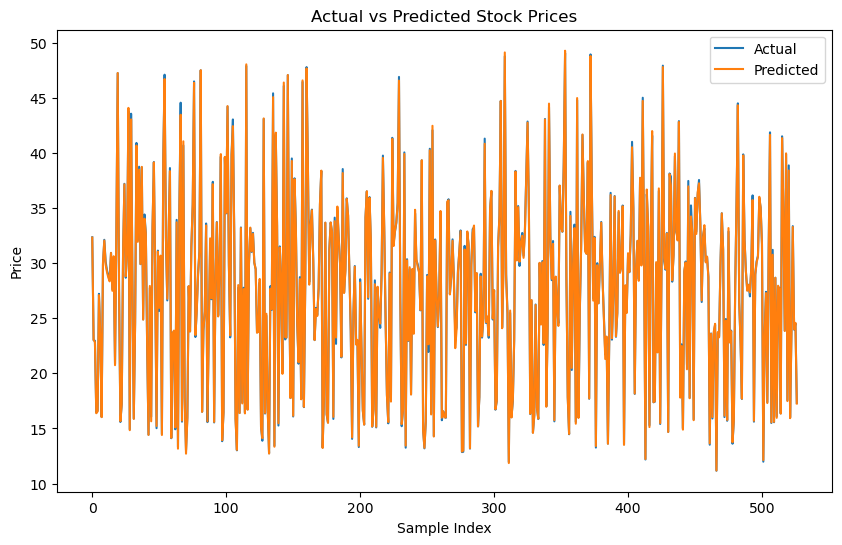

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([17.78775917, 17.42597998, 16.94838172, ..., 27.26602106,
       27.2827615 , 27.20366711])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value43
enter a value234
enter a value234
338.6348168614049


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("BAC_model.pkl",'wb')
pickle.dump(model,file)